In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import images
daisy = cv.imread('a1images/daisy.jpg')
assert daisy is not None


In [ ]:
mask = np.zeros(daisy.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)



In [4]:
rect = (50,100,550,490)
cv.grabCut(daisy,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')

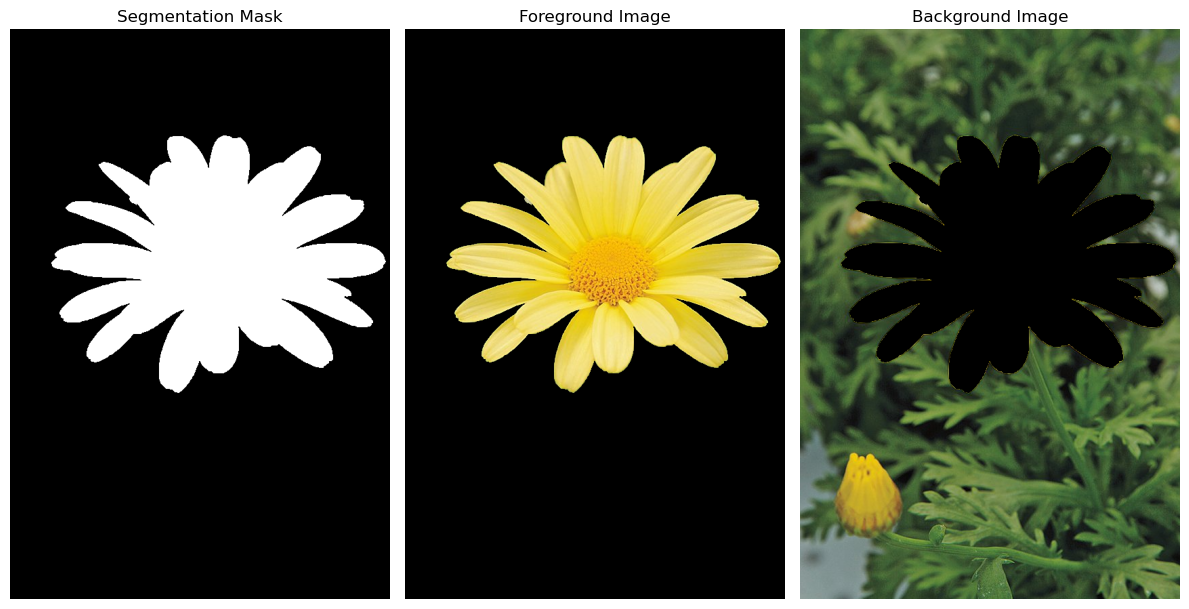

In [5]:
# Extract the foreground by multiplying the mask with the image
foreground = daisy * mask2[:, :, np.newaxis]

# Extract the background by subtracting the foreground from the original image
background = cv.subtract(daisy, foreground)

# Show the results
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

axs[0].imshow(mask2, cmap='gray')
axs[0].set_title('Segmentation Mask')
axs[0].axis('off')

axs[1].imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
axs[1].set_title('Foreground Image')
axs[1].axis('off')

axs[2].imshow(cv.cvtColor(background, cv.COLOR_BGR2RGB))
axs[2].set_title('Background Image')
axs[2].axis('off')

plt.tight_layout()
plt.show()

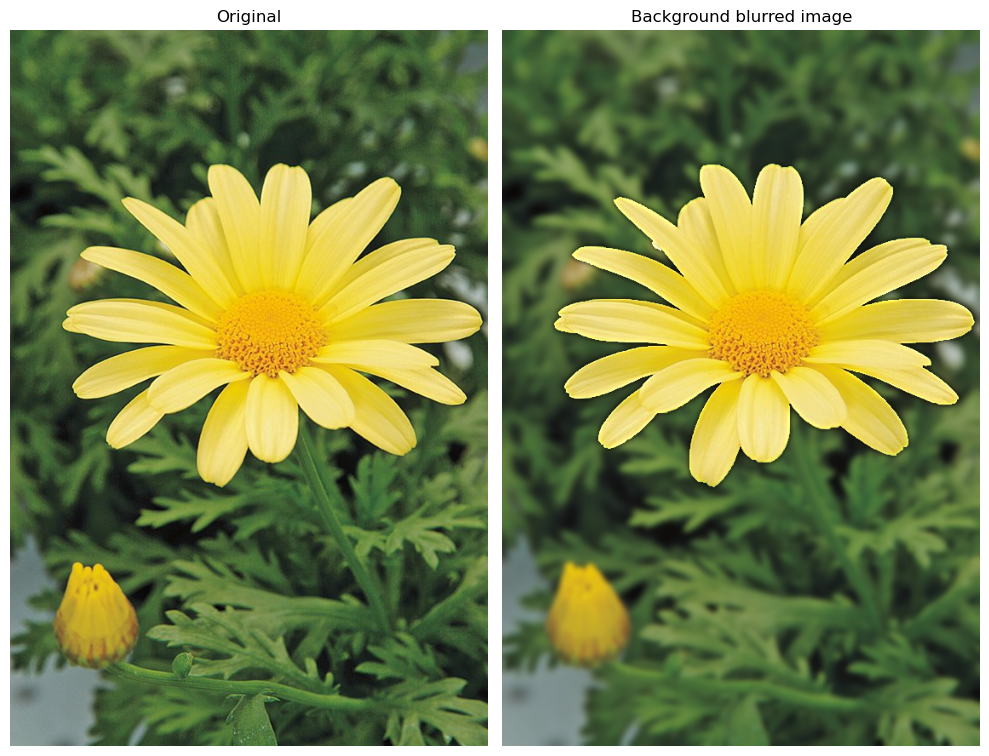

In [6]:
# Apply Gaussian blur to the background
blurred_background = cv.GaussianBlur(background, (25, 25), 3)

# Join image
blurred = cv.add(foreground, blurred_background)

# Show the results
fig, axs = plt.subplots(1, 2, figsize=(10, 8))

axs[0].imshow(cv.cvtColor(daisy, cv.COLOR_BGR2RGB))
axs[0].set_title('Original')
axs[0].axis('off')

axs[1].imshow(cv.cvtColor(blurred, cv.COLOR_BGR2RGB))
axs[1].set_title('Background blurred image')
axs[1].axis('off')

plt.tight_layout()
plt.show()